In [1]:
import libs.ssnmf_train as train
import libs.ssnmf_test as test

# Parameters:
* The number of sub topics: **n_topics**
* A loss function for NMF model: **betaloss** ‘frobenius’, ‘kullback-leibler’, ‘itakura-saito’
* Used brown corpus as a background corpus: **bckg_brown**
* The number of words to show us: **word_count**
* **context** is a dictionary which has four components that are nmf_list, W_list, tfidf, and tfidf_vectorizer, respectively.
* To export result to a file: **output_file**

# Train

In [2]:
input_file = 'pruned_schwartz.json'
beta_loss = 'kullback-leibler'
bckgrnd_brown = False
n_of_topics = 3
n_of_top_words = 7
n_of_words = 10

In [3]:
train_context = train.train_model(filepath=input_file, n_topics=n_of_topics, betaloss=beta_loss, bckg_brown=bckgrnd_brown)

Extracting tf-idf features for NMF...
Fitting NMF for 'universalism', 'hedonism', 'achievement', 'power', 'self-direction', 'benevolence', 'conformity', 'tradition', 'stimulation', 'security'


In [4]:
train.report_training_topics(train_context, n_top_words=n_of_top_words, n_topics=n_of_topics)


Topics in NMF model:
universalism
Topic #0: environmental - state - movement - social - marriage - party - samesex
Topic #1: right - peace - social - war - state - law - one
Topic #2: energy - specie - ecology - human - use - resource - natural

hedonism
Topic #0: pain - orgasm - empathy - one - people - may - happiness
Topic #1: one - happiness - pleasure - social - desire - anxiety - life
Topic #2: may - one - experience - also - pleasure - shame - emotion

achievement
Topic #0: social - capital - class - society - labour - inequality - work
Topic #1: work - hour - individual - social - goal - high - management
Topic #2: capital - status - social - human - need - individual - people

power
Topic #0: power - use - experiment - milgram - make - control - process
Topic #1: time - state - wealth - power - collapse - class - may
Topic #2: authority - power - veto - bill - social - state - individual

self-direction
Topic #0: creativity - play - creative - intelligence - new - process - t

In [5]:
train.report_df(train_context, word_count=n_of_words)

,universalism (0) - word,universalism (0) - score,universalism (1) - word,universalism (1) - score,universalism (2) - word,universalism (2) - score,benevolence (0) - word,benevolence (0) - score,benevolence (1) - word,benevolence (1) - score,...,stimulation (1) - word,stimulation (1) - score,stimulation (2) - word,stimulation (2) - score,self-direction (0) - word,self-direction (0) - score,self-direction (1) - word,self-direction (1) - score,self-direction (2) - word,self-direction (2) - score
0,environmental,44.341,right,27.161,energy,16.694,law,27.362,good,17.017,...,tourism,33.536,sport,28.382,creativity,49.497,innovation,19.323,yes,16.829
1,state,21.564,peace,23.672,specie,16.603,truth,24.368,evil,16.360,...,travel,13.633,travel,6.909,play,22.884,idea,14.664,independence,11.714
2,movement,21.351,social,18.773,ecology,15.994,theory,22.479,one,14.514,...,million,7.585,adventure,6.706,creative,21.760,intelligence,11.662,invention,8.149
3,social,18.248,war,18.307,human,15.343,ethic,21.943,justice,12.970,...,tourist,7.261,exploration,6.632,intelligence,11.967,unite,11.444,bully,7.354
4,marriage,17.337,state,15.614,use,15.206,good,21.756,pardon,12.857,...,international,7.175,use,5.719,new,10.724,territory,10.310,state,7.038
5,party,16.351,law,13.904,resource,14.363,forgiveness,20.510,lie,12.480,...,country,7.127,include,5.439,process,10.512,group,10.087,positive,6.946
6,samesex,16.254,one,12.946,natural,12.585,one,18.143,trust,11.682,...,billion,5.919,game,5.262,theory,10.306,new,9.977,task,6.875
7,green,15.452,equality,12.716,development,11.683,natural,15.552,individual,11.309,...,world,5.758,may,5.130,work,10.105,state,9.762,individual,6.639
8,right,13.359,world,11.611,system,11.499,moral,13.487,social,10.820,...,destination,4.942,also,4.996,also,9.268,curiosity,9.395,emotion,6.399
9,environment,12.391,human,11.382,study,10.559,may,12.825,moral,10.803,...,unite,4.878,explorer,4.961,secession,8.905,music,8.815,yes yes,6.319


In [6]:
train.report_train_excel(train_context, output_file = "train_result_%d_%s_%s.xlsx" % (n_of_topics,beta_loss,bckgrnd_brown), word_count=-1)

In [7]:
pretrained_doc_name = "pretrained.p"
train.create_trained_data(train_context, output_file = pretrained_doc_name)

# Test

In [8]:
test.print_training_topics(pretrained_doc_name, n_top_words=n_of_top_words, n_topics=n_of_topics)


Topics in NMF model:
universalism
Topic #0: environmental state movement social marriage party samesex
Topic #1: right peace social war state law one
Topic #2: energy specie ecology human use resource natural

hedonism
Topic #0: pain orgasm empathy one people may happiness
Topic #1: one happiness pleasure social desire anxiety life
Topic #2: may one experience also pleasure shame emotion

achievement
Topic #0: social capital class society labour inequality work
Topic #1: work hour individual social goal high management
Topic #2: capital status social human need individual people

power
Topic #0: power use experiment milgram make control process
Topic #1: time state wealth power collapse class may
Topic #2: authority power veto bill social state individual

self-direction
Topic #0: creativity play creative intelligence new process theory
Topic #1: innovation idea intelligence unite territory group new
Topic #2: yes independence invention bully state positive task

benevolence
Topic #0:

In [9]:
test.get_pretrained_words(pretrained_doc_name, normalized=True, word_count=n_of_words)

,universalism (0) - word,universalism (0) - score,universalism (1) - word,universalism (1) - score,universalism (2) - word,universalism (2) - score,benevolence (0) - word,benevolence (0) - score,benevolence (1) - word,benevolence (1) - score,...,stimulation (1) - word,stimulation (1) - score,stimulation (2) - word,stimulation (2) - score,self-direction (0) - word,self-direction (0) - score,self-direction (1) - word,self-direction (1) - score,self-direction (2) - word,self-direction (2) - score
0,environmental,10.19,right,8.04,energy,5.53,law,8.65,good,6.61,...,tourism,35.76,sport,27.96,creativity,19.12,innovation,9.31,yes,11.43
1,state,4.95,peace,7.01,specie,5.50,truth,7.70,evil,6.35,...,travel,14.54,travel,6.81,play,8.84,idea,7.06,independence,7.96
2,movement,4.91,social,5.56,ecology,5.29,theory,7.11,one,5.64,...,million,8.09,adventure,6.61,creative,8.41,intelligence,5.62,invention,5.54
3,social,4.19,war,5.42,human,5.08,ethic,6.94,justice,5.04,...,tourist,7.74,exploration,6.53,intelligence,4.62,unite,5.51,bully,5.00
4,marriage,3.98,state,4.62,use,5.03,good,6.88,pardon,4.99,...,international,7.65,use,5.63,new,4.14,territory,4.96,state,4.78
5,party,3.76,law,4.12,resource,4.75,forgiveness,6.48,lie,4.85,...,country,7.60,include,5.36,process,4.06,group,4.86,positive,4.72
6,samesex,3.73,one,3.83,natural,4.17,one,5.74,trust,4.54,...,billion,6.31,game,5.18,theory,3.98,new,4.80,task,4.67
7,green,3.55,equality,3.76,development,3.87,natural,4.92,individual,4.39,...,world,6.14,may,5.05,work,3.90,state,4.70,individual,4.51
8,right,3.07,world,3.44,system,3.81,moral,4.26,social,4.20,...,destination,5.27,also,4.92,also,3.58,curiosity,4.52,emotion,4.35
9,environment,2.85,human,3.37,study,3.49,may,4.06,moral,4.20,...,unite,5.20,explorer,4.89,secession,3.44,music,4.24,yes yes,4.29


## Evaluating Different Documents

In [10]:
# Pope ted talk, https://www.ted.com/speakers/pope_francis
test_doc_names = ["pope.txt", "dod.txt", "https://www.nationalgeographic.com/science/space/solar-system/earth/"]

### Evaluate model for the test_corpus

In [11]:
test_corpusPP, test_context = test.prepare_test_docs(test_doc_names, pretrained_doc_name, betaloss=beta_loss)

Fitting NMF for 'universalism', 'hedonism', 'achievement', 'power', 'self-direction', 'benevolence', 'conformity', 'tradition', 'stimulation', 'security'


### Results for test_corpus

Document 1: dod.txt


Topic Distribution: 
Doc 1	: (security (2), 83.75)  (security (1), 69.58)  (universalism (1), 60.10)  (universalism (0), 59.62)  (universalism (2), 55.13)  (security (0), 53.98)  (power (2), 43.52)  (achievement (1), 38.65)  (self-direction (1), 37.44)  (conformity (2), 31.47)  (stimulation (1), 28.89)  (power (1), 22.11)  (stimulation (2), 17.11)  (power (0), 17.07)  (benevolence (1), 8.57)  (benevolence (2), 7.29)  (achievement (2), 7.24)  (tradition (1), 4.38)  (self-direction (2), 2.65)  



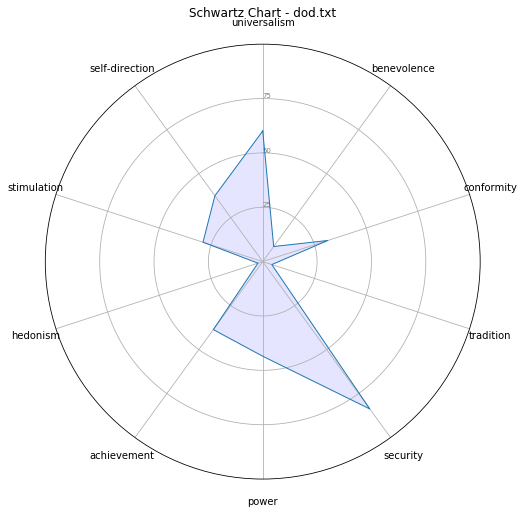

,universalism (0) - word,universalism (0) - score,universalism (1) - word,universalism (1) - score,universalism (2) - word,universalism (2) - score,benevolence (0) - word,benevolence (0) - score,benevolence (1) - word,benevolence (1) - score,...,stimulation (1) - word,stimulation (1) - score,stimulation (2) - word,stimulation (2) - score,self-direction (0) - word,self-direction (0) - score,self-direction (1) - word,self-direction (1) - score,self-direction (2) - word,self-direction (2) - score
0,% UNIVERSALISM (0),59.620,% UNIVERSALISM (1),60.100,% UNIVERSALISM (2),55.130,% BENEVOLENCE (0),0.0,% BENEVOLENCE (1),8.570,...,% STIMULATION (1),28.890,% STIMULATION (2),17.110,% SELF-DIRECTION (0),0.090,% SELF-DIRECTION (1),37.440,% SELF-DIRECTION (2),2.650
1,state,16.098,right,26.638,resource,12.852,one,0.0,one,3.772,...,million,21.789,also,6.737,new,0.022,new,17.722,state,0.801
2,right,9.973,peace,23.216,think,9.013,people,0.0,individual,2.939,...,country,20.474,physical,4.835,also,0.019,state,17.341,individual,0.756
3,new,9.211,war,17.954,one,8.362,also,0.0,people,2.043,...,world,16.542,one,4.732,state,0.018,one,12.767,new,0.711
4,woman,9.082,state,15.314,world,8.104,individual,0.0,state,1.995,...,new,10.417,people,4.050,think,0.016,nation,11.782,also,0.643
5,country,8.996,one,12.697,also,7.447,right,0.0,also,1.914,...,one,9.485,new,3.821,people,0.015,also,11.012,one,0.575
6,world,7.631,world,11.387,peace,7.411,state,0.0,right,1.743,...,people,9.437,time,3.494,one,0.014,people,9.595,lead,0.518
7,government,7.390,people,10.365,state,5.596,act,0.0,act,1.563,...,also,8.602,part,3.406,individual,0.013,information,7.603,think,0.439
8,also,7.039,also,10.041,need,5.289,would,0.0,need,1.297,...,state,7.666,world,2.944,need,0.010,need,7.426,people,0.422
9,people,6.568,nation,6.120,security,5.001,find,0.0,power,1.269,...,service,7.150,coast,2.701,different,0.009,time,7.401,would,0.399


In [12]:
test.report_interactive_result(test_context, test_doc_names, pretrained_doc_name, purity_score = False, word_count = n_of_words, only_doc_words=True)

In [13]:
test.report_test_excel(test_context, test_corpusPP, test_doc_names, output_file = "test_result.xlsx")

,name,universalism,benevolence,conformity,tradition,security,power,achievement,hedonism,stimulation,self-direction,Text
0,pope.txt,7.913649,64.425988,42.703215,24.669091,7.265602,9.021794,10.414711,37.905982,21.576862,4.227950,good even good morning sure time regardless ho...
1,dod.txt,60.095784,8.569043,31.472964,4.382929,83.753992,43.518142,38.651122,2.308613,28.887973,37.437019,behalf secretary defense deputy secretary defe...
2,https://www.nationalgeographic.com/science/spa...,82.876822,6.920448,0.023246,0.405236,43.836033,38.181707,7.446745,5.811912,58.908190,0.002876,earth home planet planet solar system know har...


In [14]:
test.report_test_csv(test_context, test_corpusPP, test_doc_names, output_file = "test_result.csv")

,name,universalism,benevolence,conformity,tradition,security,power,achievement,hedonism,stimulation,self-direction,Text
0,pope.txt,7.913649,64.425988,42.703215,24.669091,7.265602,9.021794,10.414711,37.905982,21.576862,4.227950,good even good morning sure time regardless ho...
1,dod.txt,60.095784,8.569043,31.472964,4.382929,83.753992,43.518142,38.651122,2.308613,28.887973,37.437019,behalf secretary defense deputy secretary defe...
2,https://www.nationalgeographic.com/science/spa...,82.876822,6.920448,0.023246,0.405236,43.836033,38.181707,7.446745,5.811912,58.908190,0.002876,earth home planet planet solar system know har...
